In [ ]:
import pandas as pd
import psycopg2
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='postgres',
    dbname='ecommerce_15Dec24',
    port='5432'  # Default PostgreSQL port is 5432
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Hp/OneDrive/Desktop/Ecommerce'

def get_sql_type(dtype):
    """Map pandas dtypes to PostgreSQL data types."""
    if pd.api.types.is_integer_dtype(dtype):
        return 'INTEGER'
    elif pd.api.types.is_float_dtype(dtype):
        return 'REAL'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'"{col}" {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS "{table_name}" ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the PostgreSQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO \"{table_name}\" ({', '.join(['\"' + col + '\"' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
cursor.close()
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [ ]:
import psycopg2

try:
    # Establish a database connection
    conn = psycopg2.connect(host = "localhost",
                      user = "postgres",
                      password = "postgres",
                      dbname = "ecommerce_15Dec24",
                      port="5432")  # Or your configured port
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # This clears any aborted transaction
    
    # Execute your query
    query = """SELECT DISTINCT customer_city FROM customers"""
    cur.execute(query)
    data = cur.fetchall()
    print(data)
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()



[('bom jardim de minas',), ('alto rio doce',), ('alvorada do gurgueia',), ('batatais',), ('capao da porteira',), ('icatu',), ('osorio',), ('populina',), ('novo mundo',), ('tururu',), ("alta floresta d'oeste",), ('cajamar',), ('presidente lucena',), ('santa maria do salto',), ('cacador',), ('araxa',), ('carnaubais',), ('lindolfo collor',), ('japira',), ('botelho',), ('tabapua',), ('joao camara',), ('barrolandia',), ('nepomuceno',), ('ibertioga',), ('frei lagonegro',), ('sao jose da barra',), ('pitangui',), ('jaragua do sul',), ('ervalia',), ('governador celso ramos',), ('santa ernestina',), ('quatro bocas',), ('grao mogol',), ('diamantina',), ('itaju',), ('tiradentes',), ('junqueiro',), ('macambira',), ('barauna',), ('ibirapua',), ('uniao do sul',), ('palma',), ('agrolandia',), ('bom jesus da serra',), ('surubim',), ('unai',), ('formosa do rio preto',), ('medianeira',), ('japoata',), ('emilianopolis',), ('lupionopolis',), ('ivai',), ('picui',), ('cabeceira grande',), ('narandiba',), ('v

In [19]:
# Count the number of orders placed in 2017.

import psycopg2

try:
    # Establish a database connection
    conn = psycopg2.connect(host = "localhost",
                      user = "postgres",
                      password = "postgres",
                      dbname = "ecommerce_15Dec24",
                      port="5432")  # Or your configured port
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # This clears any aborted transaction
    
    # Execute your query
    query = """SELECT COUNT(order_id) FROM orders WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2017;"""
    cur.execute(query)
    data = cur.fetchall()
    print("Total orders placed in 2017 are:",data[0][0])
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()




Total orders placed in 2017 are: 90202


In [29]:
# Find the total sales per category.
import psycopg2

try:
    # Establish a database connection
    conn = psycopg2.connect(host = "localhost",
                      user = "postgres",
                      password = "postgres",
                      dbname = "ecommerce_15Dec24",
                      port="5432")  # Or your configured port
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # This clears any aborted transaction
    
    # Execute your query
    query = """SELECT 
    UPPER(products.product_category) AS category,
    ROUND(SUM(payments.payment_value)::NUMERIC, 2) AS sales
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    products.product_category;"""
    cur.execute(query)
    data = cur.fetchall()
    #print(data)
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()

df = pd.DataFrame(data, columns=["Category", "Sales"])
df



,Category,Sales
0,AGRO INDUSTRIA E COMERCIO,237461.00
1,ART,61985.90
2,ARTS AND CRAFTS,4652.34
3,AUDIO,120649.00
4,AUTOMOTIVE,1704580.00
...,...,...
69,TECHNICAL BOOKS,49830.90
70,TELEPHONY,973754.00
71,TOYS,1238080.00
72,WATCHES PRESENT,2858430.00


In [32]:
# Calculate the percentage of orders that were paid in installments.

import psycopg2

try:
    # Establish a database connection
    conn = psycopg2.connect(host = "localhost",
                      user = "postgres",
                      password = "postgres",
                      dbname = "ecommerce_15Dec24",
                      port="5432")  # Or your configured port
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # This clears any aborted transaction
    
    # Execute your query
    query = """select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments;"""
    cur.execute(query)
    data = cur.fetchall()
    print(data[0][0])
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()

0


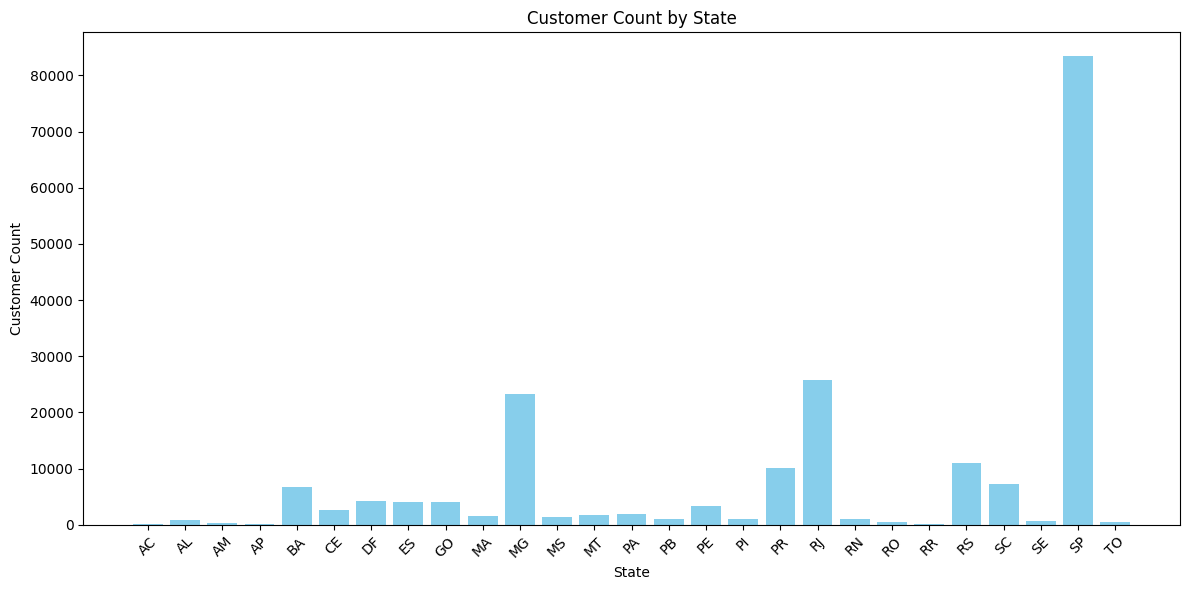

In [39]:
# Count the number of customers from each state. 

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Establish a database connection
    conn = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="postgres",
        dbname="ecommerce_15Dec24",
        port="5432"  # Or your configured port
    )
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # Clears any aborted transaction
    
    # Execute your query
    query = """SELECT customer_state, COUNT(customer_id) AS customer_count 
               FROM customers 
               GROUP BY customer_state;"""
    cur.execute(query)
    data = cur.fetchall()
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()

# Create a DataFrame from the query results
df = pd.DataFrame(data, columns=["State", "Customer Count"])

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df["State"], df["Customer Count"], color='skyblue')

# Add labels, title, and formatting
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.title("Customer Count by State")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

In [41]:
# Calculate the number of orders per month in 2018.

import psycopg2

try:
    # Establish a database connection
    conn = psycopg2.connect(host = "localhost",
                      user = "postgres",
                      password = "postgres",
                      dbname = "ecommerce_15Dec24",
                      port="5432")  # Or your configured port
    cur = conn.cursor()  # Initialize cursor
    
    # Reset the transaction if necessary
    conn.rollback()  # This clears any aborted transaction
    
    # Execute your query
    query = """SELECT 
    EXTRACT(MONTH FROM order_purchase_timestamp::timestamp) AS months, 
    COUNT(order_id) AS order_count
FROM 
    orders
WHERE 
    EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2018
GROUP BY 
    EXTRACT(MONTH FROM order_purchase_timestamp::timestamp)
ORDER BY 
    months;"""
    cur.execute(query)
    data = cur.fetchall()
    print(data)
    
except psycopg2.Error as db_error:
    # Handle database-related errors
    print("Database error occurred:", db_error)
except Exception as e:
    # Handle general exceptions
    print("An error occurred:", e)
finally:
    # Safely close cursor and connection if they exist
    if 'cur' in locals() and not cur.closed:
        cur.close()
    if 'conn' in locals() and conn:
        conn.close()

[(Decimal('1'), 14538), (Decimal('2'), 13456), (Decimal('3'), 14422), (Decimal('4'), 13878), (Decimal('5'), 13746), (Decimal('6'), 12334), (Decimal('7'), 12584), (Decimal('8'), 13024), (Decimal('9'), 32), (Decimal('10'), 8)]
